<a href="https://colab.research.google.com/github/AveryHsieh/Machine-Learning/blob/main/Dataset_of_songs_in_Spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 分群 (Cluster Analysis)練習 :
1. 使用Spotify的音樂資料集，實作 3 種不同分群方法(Partitioning Method、
Hierarchical Method、Density-Based Method)，各選一種。
2. 將 3 種分群的結果分別轉換成預測類別，並和 label 計算 confusion matrix 並使用熱圖視覺化。
3. 評估 3 種分群方法的預測結果，並比較三種不同的分群方式在本次任務下誰的效果較好。(有 label 或無 label 的評估方式都要有)

##載入函式庫（libraries）

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np

## 導入data set


資料集來源 : https://www.kaggle.com/datasets/mrmorj/dataset-of-songs-in-spotify

連接Google Drive，並使用read_csv()函數導入CSV格式的數據集

In [ ]:
#連接Google雲端硬碟
from google.colab import drive
drive.mount('/content/drive')

data_all = pd.read_csv("/content/drive/MyDrive/112-1/機器學習觀念與應用/練習四/genres_v2.csv")

Mounted at /content/drive


<ipython-input-3-565b8157df20>:5: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  data_all = pd.read_csv("/content/drive/MyDrive/112-1/機器學習觀念與應用/練習四/genres_v2.csv")


## 查看資料集

In [ ]:
data_all.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


In [ ]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

In [ ]:
# 確認有無NA值
data_all.isnull().sum()

danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
type                    0
id                      0
uri                     0
track_href              0
analysis_url            0
duration_ms             0
time_signature          0
genre                   0
song_name           20786
Unnamed: 0          21525
title               21525
dtype: int64

In [ ]:
answer.head()

,Playlist,Genre
0,19WuHd4MxWLzE1fpMmw4S4,Dark Trap
1,6XyR8uzgkSoDzHuOxxRtLH,Dark Trap
2,37Ij3ofyhvEhFEH8YZMZ2X,Dark Trap
3,07zTlfPpsxeoWdumbkNWMI,Dark Trap
4,2dClSRLsnptdkDQnpi5H2f,Dark Trap


In [ ]:
answer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Playlist  39 non-null     object
 1   Genre     39 non-null     object
dtypes: object(2)
memory usage: 752.0+ bytes


# 模型實作與比較
1. 實作 3 種不同分群方法(Partitioning Method、Hierarchical Method、Density-Based Method)，各選一種。



In [ ]:
# 取6000筆sample
data = data_all.sample(n=6000, random_state=1)

# 提取特徵
features=data.drop(["title","Unnamed: 0","song_name","analysis_url","track_href","uri","id","type"],axis=1) #drop all non-numeric columns
X=features.drop("genre",axis=1)
y=features["genre"]


# 將類別變數"genre"轉換成數字
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


# 正規化特徵
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

> Partitioning Method: K-means 分群

In [ ]:
from sklearn.cluster import KMeans
# K-means 分群
kmeans = KMeans(n_clusters=15, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_features)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


> Hierarchical Method: Agglomerative Approach

In [ ]:
# Agglomerative分群
agg = AgglomerativeClustering(n_clusters=15)
agg_labels = agg.fit_predict(scaled_features)


In [ ]:
agg_labels

array([ 8,  5,  2, ..., 10, 10,  9])

> Density-Based Method: DBSCAN

In [ ]:
# DBSCAN 分群
dbscan = DBSCAN(eps=3, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_features)


2. 將 3 種分群的結果分別轉換成預測類別，並和 label 計算 confusion matrix 並使用熱圖視覺化。

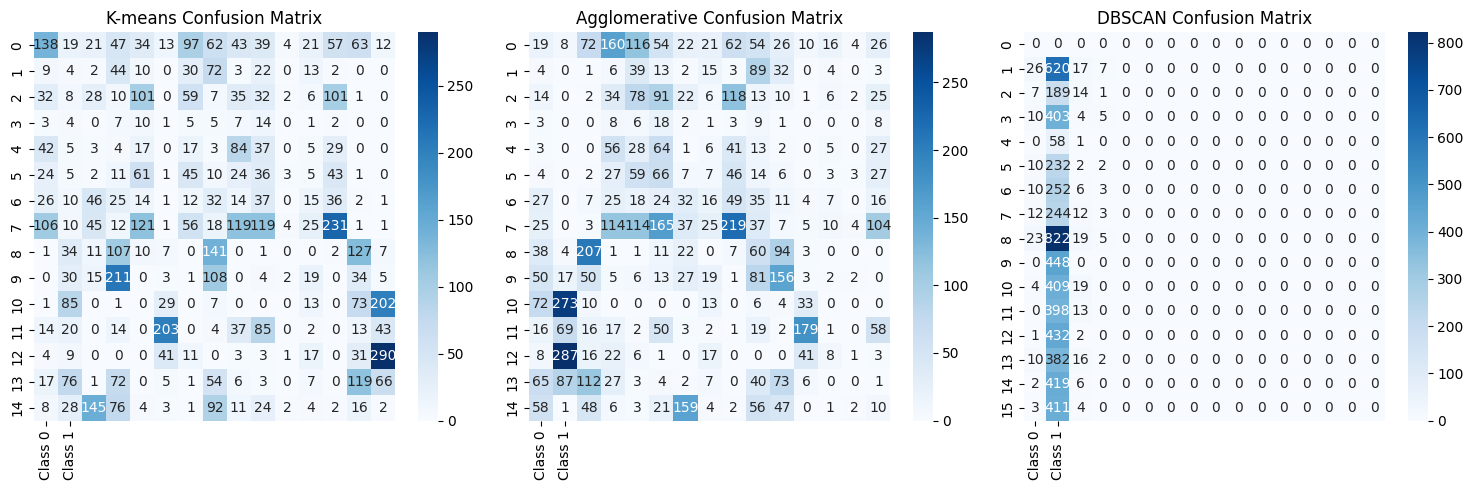

In [ ]:
# 將分群結果轉換為預測類別
true_labels = data["genre"]
label_encoder = LabelEncoder()
true_labels_encoded = label_encoder.fit_transform(true_labels)

# 計算混淆矩陣
kmeans_cm = confusion_matrix(true_labels_encoded, kmeans_labels)
agg_cm = confusion_matrix(true_labels_encoded, agg_labels)
dbscan_cm = confusion_matrix(true_labels_encoded, dbscan_labels)

# 繪製熱圖
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.heatmap(kmeans_cm, annot=True, fmt='g', cmap='Blues', xticklabels=["Class 0", "Class 1"])
plt.title("K-means Confusion Matrix")
plt.subplot(1, 3, 2)
sns.heatmap(agg_cm, annot=True, fmt='g', cmap='Blues', xticklabels=["Class 0", "Class 1"])
plt.title("Agglomerative Confusion Matrix")
plt.subplot(1, 3, 3)
sns.heatmap(dbscan_cm, annot=True, fmt='g', cmap='Blues', xticklabels=["Class 0", "Class 1"])
plt.title("DBSCAN Confusion Matrix")
plt.tight_layout()
plt.show()

#分群結果評估
3. 評估 3 種分群方法的預測結果，並比較三種不同的分群方式在本次任務下誰的效果較好。(有 label 或無 label 的評估方式都要有)

In [ ]:
from sklearn.metrics import fowlkes_mallows_score, silhouette_score

##Fowlkes-Mallows Scores (有標準答案)
Fowlkes-Mallows Scores measure the correctness of the cluster assignments using pairwise precision and recall. A higher score signifies higher similarity.

In [ ]:
# 計算 K-means 分群的 FMS
kmeans_fms = fowlkes_mallows_score(true_labels_encoded, kmeans_labels)

# 計算層次分群的 FMS
agg_fms = fowlkes_mallows_score(true_labels_encoded, agg_labels)

# 計算 DBSCAN 分群的 FMS
dbscan_fms = fowlkes_mallows_score(true_labels_encoded, dbscan_labels)

# 輸出 silhouette score
print("K-means Fowlkes-Mallows Score:", kmeans_fms)
print("Agglomerative Fowlkes-Mallows Score:", agg_fms)
print("DBSCAN Fowlkes-Mallows Score:", dbscan_fms)

K-means Fowlkes-Mallows Score: 0.20879584112775174
Agglomerative Fowlkes-Mallows Score: 0.20888235066363012
DBSCAN Fowlkes-Mallows Score: 0.2708287846150164


**評估指標說明:**

Fowlkes-Mallows Scores（FMI） FMI是成對的precision（精度）和recall（召回）的幾何平均數。取值範圍為 [0,1]，越接近1越好，其中1表示最佳匹配，即分群結果與真實標籤完全一致。

原文網址：https://itw01.com/8HH9YE8.html
___

**根據程式計算所得的數據，在三個模型中:**
* K-means跟Agglomerative的FMI非常接近，分別為0.20879584112775174(K-means)，及0.20888235066363012(Agglomerative)，兩者的分群效果差不多，Agglomerative略佳一些但沒有差很多。

* DBSCAN的效果最好，Fowlkes-Mallows分數為0.2708287846150164，較其他兩種方法更接近1，這表示DBSCAN的分群結果在準確性和完整性方面都相對較好。

* 分群效果排序: DBSCAN > Agglomerative > K-means

不過，整體來說，0.27仍然不是一個很好的FMI值，有可能是因為sample選擇數量不夠多所導致。

##Silhouette score (無標準答案)
Silhouette Coefficient measures the between-cluster distance against within-cluster distance. A higher score signifies better-defined clusters.

In [ ]:
from sklearn.metrics import silhouette_score

# 計算 K-means 分群的 Silhouette score
kmeans_silhouette = silhouette_score(scaled_features, kmeans_labels)

# 計算層次分群的 Silhouette score
agg_silhouette = silhouette_score(scaled_features, agg_labels)

# 計算 DBSCAN 分群的 Silhouette score（排除噪聲點）
non_noise_indices = np.where(dbscan_labels != -1)[0]
dbscan_silhouette = silhouette_score(scaled_features[non_noise_indices], dbscan_labels[non_noise_indices])

# 輸出 Silhouette score
print("K-means Silhouette Score:", kmeans_silhouette)
print("Agglomerative Silhouette Score:", agg_silhouette)
print("DBSCAN Silhouette Score (排除噪聲點):", dbscan_silhouette)

K-means Silhouette Score: 0.11292748308800586
Agglomerative Silhouette Score: 0.06542519020670635
DBSCAN Silhouette Score (排除噪聲點): 0.21704898027249875


**評估指標說明:**

輪廓係數（Silhouette Coefficient）結合了聚類的凝聚度（Cohesion）和分離度（Separation），用於評估聚類的效果。該值處於-1~1之間，數值越大，表示聚類效果越好。



原文網址：https://read01.com/R2oQBe.html
___

**根據程式計算所得的數據，在三個模型中:**
* DBSCAN 的Silhouette score值最大，K-means次之，Agglomerative最小。

* DBSCAN的分群效果最好

* 分群效果排序: DBSCAN > K-means > Agglomerative


### 分群結果評估總結
用Fowlkes-Mallows Score 和 Silhouette Score兩個方法做評測，都是DBSCAN模型表現最好，但K-means 跟 Agglomerative的排序不一樣:

* Fowlkes-Mallows Score分群效果排序: DBSCAN > Agglomerative > K-means

* Silhouette Score分群效果排序: DBSCAN > K-means > Agglomerative


   

推測原因如下:

Fowlkes-Mallows Score 和 Silhouette Score 是兩個不同的聚類評估指標，它們分別從不同的角度評估了聚類的效果，因此在相同的數據集上可能得出不同的結果。



> Fowlkes-Mallows Score： 主要考慮了聚類結果中的精確性（Precision）和召回率（Recall），並且是基於真實標籤（ground truth）和聚類結果的交叉信息計算的。Fowlkes-Mallows Score 適用於有標籤的數據，並且對於真實標籤中的正確分類有較高的要求。



> Silhouette Score： 主要評估了每個樣本與同簇中其他樣本的相似度（緊密度）和與最近非同簇樣本的相似度（分離度）。Silhouette Score 是基於樣本間的距離計算的，它可以用於有或沒有標籤的數據，並且對於簇內的緊密度和簇間的分離度有較高的要求。

兩者因計算方式和依據不同，可能導致在相同數據集上得出不同的結果。在實際應用中，需根據任務需求和數據特性選擇適合的評估指標，綜合多個指標來評估聚類結果的優劣。